In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/fifa19data.csv',index_col=0)

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.columns # some of these are unnecessary, and we'll get rid of them

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [5]:
df.drop(columns=['ID','Photo','Flag','Club Logo','Work Rate','Weak Foot','Preferred Foot','Body Type','Real Face',
                 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], inplace=True)

In [6]:
df.dropna(subset=['Height','Weight'], inplace=True) # drop all rows where either of height or weight is missing

**In the following few lines, we'll be converting the current string representations of heights, weights, values, wages and release clauses to their respective default formats, i.e. heights to inches, weights to  lbs, values, wages and release clauses to 'thousands of euros'**

In [7]:
def to_inches(row):
    lst = row.split("'")
    lst = pd.to_numeric(lst)
    new_height = (lst[0] * 12) + lst[1]
    return new_height

In [8]:
df['Height'] = df['Height'].apply(to_inches)

In [9]:
def weight_in_num(row):
    lst = row.split('lbs')
    lst = pd.to_numeric(lst)
    new_weight = lst[0]
    return new_weight

In [10]:
df['Weight'] = df['Weight'].apply(weight_in_num)

In [11]:
def value_change(row): #converting everything in terms of 'thousands of euros'
    if row[-1] == 'M':
        row = row[1:-1] # getting rid of euro and million sign
        num = pd.to_numeric(row)
        num = num * 1000
        return num
    else:
        return pd.to_numeric(row[1:-1])

In [12]:
df['Value'] = df['Value'].apply(value_change)

In [13]:
def release_clause_change(row):
    if row[-1] == 'M':
        row = row[1:-1]
        num = pd.to_numeric(row)
        num = num * 1000
        return num
    else:
        return pd.to_numeric(row[1:-1])

In [14]:
df['Release Clause'] = df[df['Release Clause'].notnull()]['Release Clause'].apply(release_clause_change)

In [15]:
def wage_change(row): # make wages in thousands of euros
    return pd.to_numeric(row[1:-1])

In [16]:
df['Wage'] = df['Wage'].apply(wage_change)

In [17]:
df.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,2202,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,2228,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0


<AxesSubplot: xlabel='SprintSpeed', ylabel='Special'>

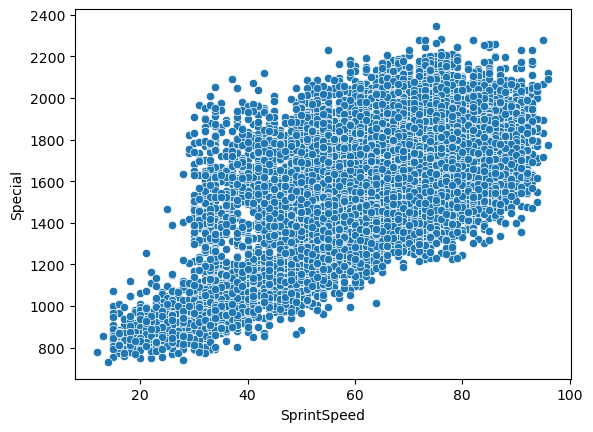

In [18]:
sns.scatterplot(y='Special',x='SprintSpeed',data=df)
# players with more 'special' rating tend to be 'speedier'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2524\4167507053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<AxesSubplot: xlabel='Age', ylabel='Density'>

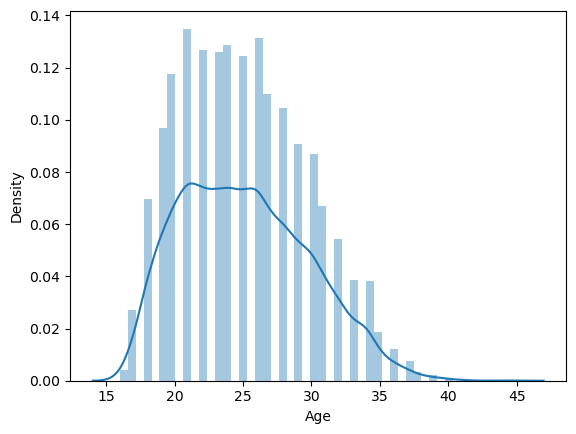

In [19]:
sns.distplot(df.Age)
# almost represents a normal distribution, (except for a few very old guys, which is good to see.
# Mr. Gauss would be a happy man.

**Just in case you wanted to know the top players right now**

In [20]:
top_class_players = df[df['Value'] > 40000]
top_class_players.head(10)

# players with a market value of more than 40 million euros
# NOTE: ('40000' in the filter is actually in terms of thousands of euros, as explained earlier)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,2202,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,2228,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,2143,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,1471,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,2281,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0
5,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,2142,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,2280,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,2346,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,2201,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000.0,94.0,1331,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500.0


And these are the teams for whom these players play... (Do you see your team here?!)

In [21]:
top_class_players.groupby('Club')['Name'].count().sort_values(ascending=False) # No wonder Madrid won 4 out of the last 6 Champions Leagues!

Club
Real Madrid            10
Manchester City         9
FC Barcelona            7
FC Bayern München       6
Atlético Madrid         5
Liverpool               4
Paris Saint-Germain     4
Napoli                  4
Juventus                4
Manchester United       4
Arsenal                 3
Tottenham Hotspur       3
Lazio                   2
Inter                   2
Olympique Lyonnais      2
Chelsea                 2
Milan                   1
Borussia Dortmund       1
Sporting CP             1
Name: Name, dtype: int64

<AxesSubplot: xlabel='Height', ylabel='Vision'>

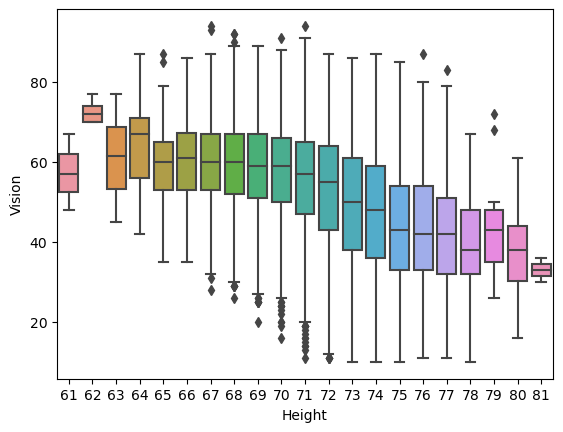

In [22]:
sns.boxplot(y='Vision',x='Height',data=df) # reaffirms the notion that shorter players are more creative, for eg. Cazorla, Messi, Mata, Silva etc.

<AxesSubplot: xlabel='Height', ylabel='Balance'>

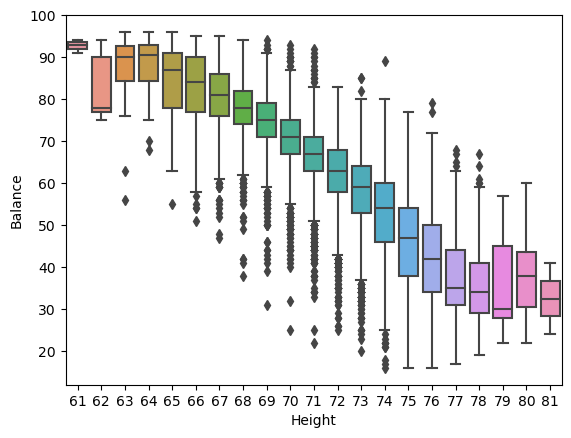

In [23]:
sns.boxplot(y='Balance',x='Height',data=df) # and this is why shorter players are quicker, they can balance themseles better!

<AxesSubplot: xlabel='Height', ylabel='Strength'>

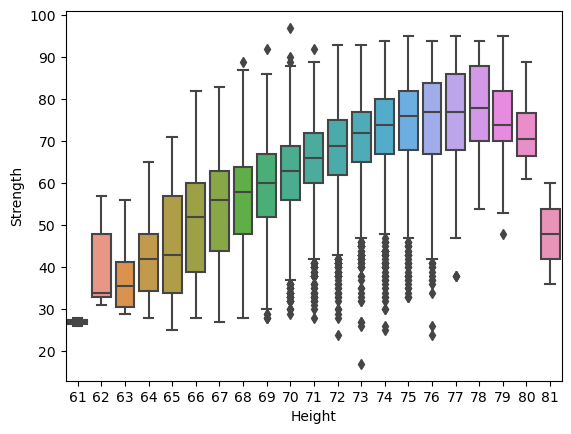

In [24]:
sns.boxplot(y='Strength',x='Height',data=df) # reaffirms the notion that shorter players are kinda weaker in duels

**Now a bombshell is about to be dropeed!**

In [25]:
df.corr()['Age'] # no visible correlation anywhere! reaffirms the notion that age is just a number!

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2524\430897541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age'] # no visible correlation anywhere! reaffirms the notion that age is just a number!


Age                         1.000000
Overall                     0.453069
Potential                  -0.252281
Value                       0.078452
Wage                        0.143944
Special                     0.236875
International Reputation    0.253765
Skill Moves                 0.027649
Height                      0.082604
Weight                      0.230213
Crossing                    0.130545
Finishing                   0.068660
HeadingAccuracy             0.147183
ShortPassing                0.132894
Volleys                     0.142472
Dribbling                   0.010166
Curve                       0.143276
FKAccuracy                  0.193467
LongPassing                 0.181310
BallControl                 0.084969
Acceleration               -0.158667
SprintSpeed                -0.151682
Agility                    -0.019395
Reactions                   0.453124
Balance                    -0.089877
ShotPower                   0.156947
Jumping                     0.177167
S

**Now comes the main analysis, predicting the World Cup 2022 contenders!**

We need a list of people who are raw today, but hold potential to be bright in the future... at least in the eyes of guys at FIFA!

In [26]:
df_raw_players_with_potential = df[(df['Overall'] <= 70) & (df['Potential'] > 80)]

This will come in handy if you wanna get a feel of someone like Arsene Wenger or Guardiola or Klopp and develop raw players into superstars!

In [27]:
df_raw_players_with_potential.sort_values(by='Potential',ascending=False)  # watch out for these players!

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7414,S. Tonali,18,Italy,68,89,Brescia,1800.0,1.0,1824,1.0,...,69.0,62.0,64.0,60.0,13.0,9.0,8.0,7.0,7.0,4700.0
6102,Riqui Puig,18,Spain,69,89,FC Barcelona,2100.0,24.0,1746,1.0,...,70.0,53.0,57.0,53.0,12.0,15.0,14.0,12.0,9.0,6500.0
7758,P. Pellegri,17,Italy,67,88,AS Monaco,1700.0,11.0,1497,1.0,...,50.0,19.0,12.0,15.0,7.0,14.0,6.0,8.0,14.0,4900.0
6032,J. Arp,18,Germany,69,88,Hamburger SV,2200.0,4.0,1547,1.0,...,58.0,18.0,17.0,20.0,14.0,12.0,10.0,7.0,11.0,4900.0
5007,Kangin Lee,17,Korea Republic,70,88,Valencia CF,3500.0,8.0,1717,1.0,...,68.0,26.0,23.0,23.0,11.0,12.0,12.0,8.0,14.0,9600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,S. Bornauw,19,Belgium,69,81,RSC Anderlecht,1600.0,4.0,1653,1.0,...,58.0,65.0,71.0,67.0,6.0,7.0,7.0,11.0,15.0,2700.0
10567,S. Chukwueze,19,Nigeria,65,81,Villarreal CF,1200.0,4.0,1553,1.0,...,50.0,18.0,21.0,28.0,13.0,7.0,9.0,7.0,6.0,3200.0
6517,L. Mühl,21,Germany,69,81,1. FC Nürnberg,1700.0,7.0,1633,1.0,...,65.0,62.0,73.0,73.0,14.0,14.0,11.0,12.0,10.0,3300.0
6544,D. Vente,19,Netherlands,69,81,Feyenoord,1800.0,4.0,1626,1.0,...,67.0,25.0,18.0,17.0,13.0,10.0,7.0,9.0,10.0,3000.0


Wouldn't surprise me to find scouts of the giant clubs sitting in the stands of these teams' games: of AS Monaco, Hertha Berlin, Anderlecht, etc

In [28]:
df_raw_players_with_potential.groupby('Club')['Club'].count().sort_values(ascending=False)

Club
FC Barcelona               6
AS Monaco                  5
Olympique Lyonnais         4
Hertha BSC                 4
FC Bayern München          4
                          ..
FC Augsburg                1
Excelsior                  1
Estudiantes de La Plata    1
Empoli                     1
Yokohama F. Marinos        1
Name: Club, Length: 168, dtype: int64

Now, for the World Cup probables, we'll set the benchmark at the age of the player being no more than 33 in 2022, i.e. 30 today, and a 'Potential' of no less than 75, if he is to be in contention for a place in the World Cup 2022 squad... pretty reasonable I guess

In [29]:
df_worldcup2022_probables = df[(df.Age<=30) & (df.Potential>75)]

In [30]:
df_worldcup2022_probables.sample()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4391,Charles,24,Brazil,71,77,Clube Sport Marítimo,2400.0,4.0,1086,1.0,...,37.0,14.0,18.0,13.0,72.0,68.0,63.0,70.0,74.0,5400.0


But this list also contains players from teams who have less than 20 players listed. And a world-cup preliminary squad is more than that, hence we'll happily drop those rows - anyway those teams wouldn't be fancied to win, if they don't have enough good players listed on FIFA.

In [31]:
df_worldcup2022_probables.groupby('Nationality')['Potential'].count()

Nationality
Albania                5
Algeria               20
Angola                 3
Antigua & Barbuda      1
Argentina            257
                    ... 
Uruguay               41
Venezuela             24
Wales                 22
Zambia                 2
Zimbabwe               1
Name: Potential, Length: 111, dtype: int64

In [32]:
df_worldcup2022_probables.groupby('Nationality').filter(lambda x: len(x) > 20)['Nationality'].value_counts()

Spain                  389
England                316
France                 295
Germany                279
Argentina              257
Brazil                 220
Italy                  177
Portugal               131
Colombia               124
Netherlands            123
Belgium                 94
Mexico                  73
United States           70
Switzerland             68
Chile                   66
Turkey                  63
Denmark                 59
Scotland                49
Nigeria                 48
Austria                 47
Croatia                 47
Serbia                  46
Norway                  42
Uruguay                 41
Sweden                  41
Ivory Coast             39
Greece                  36
Poland                  36
Ghana                   35
Russia                  35
Senegal                 34
Ukraine                 32
Japan                   27
Cameroon                26
Czech Republic          26
Morocco                 26
Venezuela               24
W

In [33]:
df_worldcup2022_probables = df_worldcup2022_probables[df_worldcup2022_probables.groupby('Nationality')['Nationality'].transform('size') > 20]

***NOW COMES THE MAIN PREDICTIONS!***

In [34]:
df_worldcup2022_probables.groupby('Nationality')['Potential'].mean().sort_values(ascending=False)

Nationality
Croatia                80.914894
France                 80.708475
Portugal               80.511450
Uruguay                80.365854
Brazil                 80.327273
Italy                  80.288136
Belgium                80.287234
Senegal                80.235294
Spain                  80.079692
Poland                 80.027778
Serbia                 80.000000
Wales                  79.954545
Ukraine                79.875000
Netherlands            79.796748
Paraguay               79.727273
Ivory Coast            79.717949
Germany                79.616487
England                79.607595
Russia                 79.514286
Morocco                79.461538
Argentina              79.459144
Nigeria                79.458333
Japan                  79.333333
Switzerland            79.235294
Denmark                79.220339
Czech Republic         79.192308
Greece                 79.055556
Cameroon               79.038462
Scotland               78.918367
Colombia               78.88709

**No wonder Croatia and France feature at the top - both these teams had youthful squads in last year's World Cup, and reached the final, which means both of 'em will have more experienced squads in three years' time, and happier prospects for them both!**